<a href="https://colab.research.google.com/github/jallenrobern/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = '/content/drive/My Drive/fruits/train'
val_dir = '/content/drive/My Drive/fruits/validation'
test_dir = '/content/drive/My Drive/fruits/test'

Import the libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to [0, 1]
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_data = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 565 images belonging to 4 classes.
Found 171 images belonging to 4 classes.
Found 235 images belonging to 4 classes.


Display sample images from the dataset

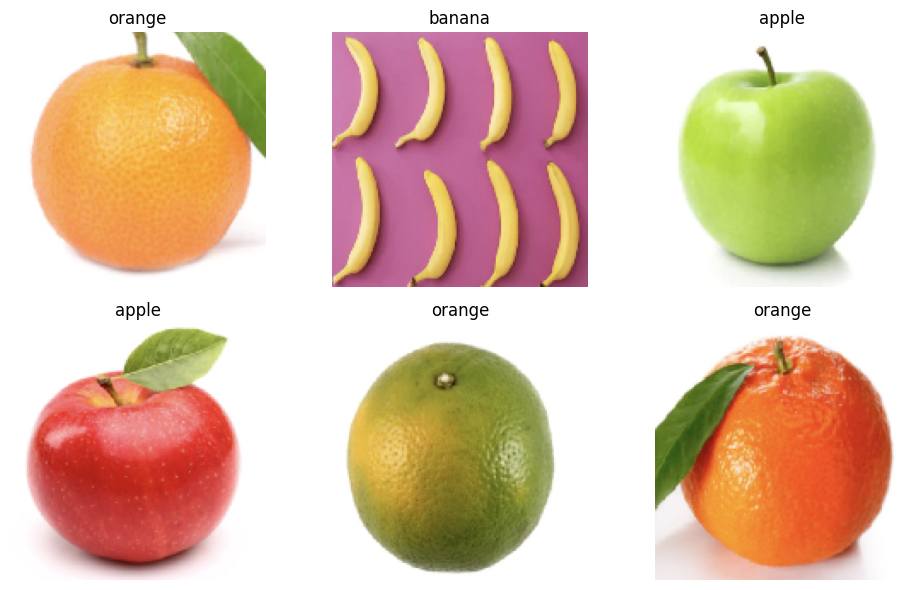

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_data)

class_names = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()

Create the Convolutional Neural Network Model (CNN)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(train_data.num_classes, activation="softmax")
])

Define the optimizer and loss function

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Train the model

In [ ]:
print(train_ds)
print(val_ds)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_ds = datagen.flow_from_directory(
    '/content/drive/My Drive/fruits/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_ds = datagen.flow_from_directory(
    '/content/drive/My Drive/fruits/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3))

Found 453 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


<Rescaling name=rescaling_38, built=False>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(train_ds.num_classes, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step - accuracy: 0.2852 - loss: 1.3850 - val_accuracy: 0.2857 - val_loss: 1.3750
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.3044 - loss: 1.3760 - val_accuracy: 0.2857 - val_loss: 1.3749
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.3126 - loss: 1.3725 - val_accuracy: 0.2679 - val_loss: 1.3644
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.2722 - loss: 1.3722 - val_accuracy: 0.4196 - val_loss: 1.3603
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.4865 - loss: 1.3393 - val_accuracy: 0.4464 - val_loss: 1.2699
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 0.4824 - loss: 1.2391 - val_accuracy: 0.5357 - val_loss: 1.0976
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step - accuracy: 0.4224 - loss: 1.2395 - val_accuracy: 0.4911 - val_loss: 1.0253
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.6112 - loss: 0.9480 - val_accuracy: 0.

Test the model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    '/content/drive/My Drive/fruits/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Found 235 images belonging to 4 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.6116 - loss: 0.9418
Test Loss: 1.1175
Test Accuracy: 0.5106


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


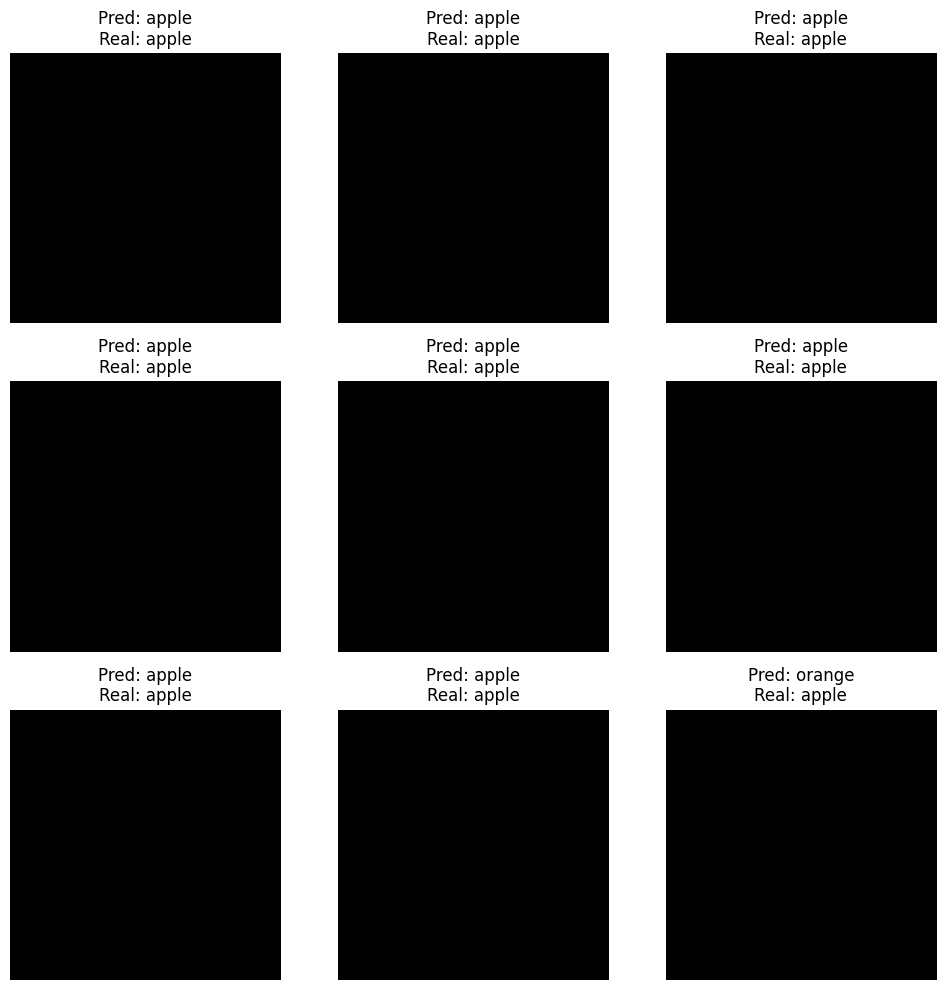

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'class_names' matches your dataset's class labels
class_names = list(test_ds.class_indices.keys())

# Get one batch from test_ds
images, labels = next(iter(test_ds))

plt.figure(figsize=(10, 10))

# Get predictions
predictions = model.predict(images)

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    pred_index = np.argmax(predictions[i])
    real_index = np.argmax(labels[i])  # Labels are one-hot encoded
    plt.title(f"Pred: {class_names[pred_index]}\nReal: {class_names[real_index]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Save the model

In [ ]:
model.save('fruitmodel.keras')